In [213]:
# This script will run a Gradient Tree Supervised Machine Learning Algorithm and a Confusion Matrix using a random data source from github. We will look for correlation within the data to create a
# model that predicts the effectiveness of a given drug based on a patients conditions 

In [214]:
# Import Libraries 

import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [215]:
# Load Data 

data = pd.read_csv(r'C:\Users\Luke\Desktop\Data_Analysis\categorical_data.csv')
data.head()

,DrugName,Condition,Side_Effects_Review,Side_Effects,Effectiveness_Review,Effectiveness
0,enalapril,management of congestive heart failure,"cough, hypotension , proteinuria, impotence , ...",Mild Side Effects,slowed the progression of left ventricular dys...,Highly Effective
1,ortho-tri-cyclen,birth prevention,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...",Severe Side Effects,Although this type of birth control has more c...,Highly Effective
2,ponstel,menstrual cramps,Heavier bleeding and clotting than normal.,No Side Effects,I was used to having cramps so badly that they...,Highly Effective
3,prilosec,acid reflux,"Constipation, dry mouth and some mild dizzines...",Mild Side Effects,The acid reflux went away for a few months aft...,Marginally Effective
4,lyrica,fibromyalgia,I felt extremely drugged and dopey. Could not...,Severe Side Effects,I think that the Lyrica was starting to help w...,Marginally Effective


In [216]:
# Encoding the dataset, each unique category value is assigned an integer value

label_encoder = LabelEncoder()

In [217]:
# Fitting the label encoder 

label_encoder.fit(data['Effectiveness'])

LabelEncoder()

In [218]:
# List the classes identified by the label encoder 

list(label_encoder.classes_)

['Considerably Effective',
 'Highly Effective',
 'Ineffective',
 'Marginally Effective',
 'Moderately Effective']

In [219]:
# Encode the months as an integer 

data['effective'] = label_encoder.transform(data['Effectiveness'])
data['DrugName'].value_counts()[:15]

lexapro       74
paxil         58
retin-a       55
synthroid     53
zoloft        52
prozac        51
effexor       46
effexor-xr    46
chantix       44
accutane      44
propecia      43
lipitor       42
wellbutrin    42
cymbalta      41
lamictal      39
Name: DrugName, dtype: int64

In [220]:
# Redefine the effective category, scoring it from 1-5, Ineffective-Highly Effective

effect = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    "Moderately Effective": 2,
    "Considerably Effective": 3,
    "Highly Effective": 4
}

In [221]:
# Use the lambda function to arrange the integer encoded effectiveness into chronilogical order 

data["effective"] = data["Effectiveness"].apply(lambda x: effect[x])
data.head()

,DrugName,Condition,Side_Effects_Review,Side_Effects,Effectiveness_Review,Effectiveness,effective
0,enalapril,management of congestive heart failure,"cough, hypotension , proteinuria, impotence , ...",Mild Side Effects,slowed the progression of left ventricular dys...,Highly Effective,4
1,ortho-tri-cyclen,birth prevention,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...",Severe Side Effects,Although this type of birth control has more c...,Highly Effective,4
2,ponstel,menstrual cramps,Heavier bleeding and clotting than normal.,No Side Effects,I was used to having cramps so badly that they...,Highly Effective,4
3,prilosec,acid reflux,"Constipation, dry mouth and some mild dizzines...",Mild Side Effects,The acid reflux went away for a few months aft...,Marginally Effective,1
4,lyrica,fibromyalgia,I felt extremely drugged and dopey. Could not...,Severe Side Effects,I think that the Lyrica was starting to help w...,Marginally Effective,1


In [222]:
# Drop the Effectiveness, Effectiveness_Review, Side_Effects, and Side_Effects_Review column as we won't be using them for the model 

data.drop(['Effectiveness', "Effectiveness_Review", "Side_Effects", "Side_Effects_Review"], axis = 1, inplace = True)
data.head()

,DrugName,Condition,effective
0,enalapril,management of congestive heart failure,4
1,ortho-tri-cyclen,birth prevention,4
2,ponstel,menstrual cramps,4
3,prilosec,acid reflux,1
4,lyrica,fibromyalgia,1


In [224]:
# Binary Encode the rest of the columns that will be used for the model. Use the pandas .get_dummies function 

encoded_data = pd.get_dummies(data, columns=["DrugName", "Condition"])

In [225]:
# Define the feature set of the data, which will be effective (ie effectiveness) because we are building a model to predict the effectiveness based on the patients medication and conditions 

X = encoded_data.copy()
X.drop("effective", axis=1, inplace=True)
X.head()

,DrugName_abilify,DrugName_acanya,DrugName_accolate,DrugName_accupril,DrugName_accutane,DrugName_aciphex,DrugName_actiq,DrugName_actonel,DrugName_actos,DrugName_acyclovir,...,Condition_wrinkles around eyes,Condition_wrinkles premature aging,"Condition_wrinkles, brown spots","Condition_wrinkles, furrows","Condition_wrinkles,uneven skin tone,large pores",Condition_wrinkling aroung the eyes and lips,Condition_year round allergies,Condition_yeast,Condition_yeast diaper rash,Condition_yeast infection
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
# Define target vector

y = encoded_data["effective"].values.reshape(-1, 1)
y[:5]

array([[4],
       [4],
       [4],
       [1],
       [1]], dtype=int64)

In [227]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [228]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.420
Accuracy score (validation): 0.421

Learning rate:  0.1
Accuracy score (training): 0.421
Accuracy score (validation): 0.420

Learning rate:  0.25
Accuracy score (training): 0.452
Accuracy score (validation): 0.420

Learning rate:  0.5
Accuracy score (training): 0.470
Accuracy score (validation): 0.419

Learning rate:  0.75
Accuracy score (training): 0.471
Accuracy score (validation): 0.423

Learning rate:  1
Accuracy score (training): 0.469
Accuracy score (validation): 0.416



In [229]:
# The results above show that we don't have a super strong model, and we seem to have the best model wutg a .75 learning rate 

In [230]:
# Create a Gradient Boosting Classifier 

# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,4,4
1,4,0
2,4,4
3,4,4
4,4,4
5,3,3
6,4,1
7,4,3
8,4,4
9,4,4


In [231]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")# Calculating the accuracy score

Accuracy Score : 0.42318840579710143


In [232]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5"],
    columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5"]
)

# Displaying results
display(cm_df)

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,1,0,0,3,66
Actual 2,1,1,0,7,51
Actual 3,0,0,4,9,142
Actual 4,2,1,3,29,279
Actual 5,2,3,5,23,403


In [233]:
# The graphic above is a confusion matrix. The columns represent how many times the model predicted the effectiveness of a given drug based on the patients conditions. 1-5 - 1 being Ineffective - 5 being Highly Effective 

In [234]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.17      0.01      0.03        70
           1       0.20      0.02      0.03        60
           2       0.33      0.03      0.05       155
           3       0.41      0.09      0.15       314
           4       0.43      0.92      0.59       436

    accuracy                           0.42      1035
   macro avg       0.31      0.21      0.17      1035
weighted avg       0.38      0.42      0.30      1035



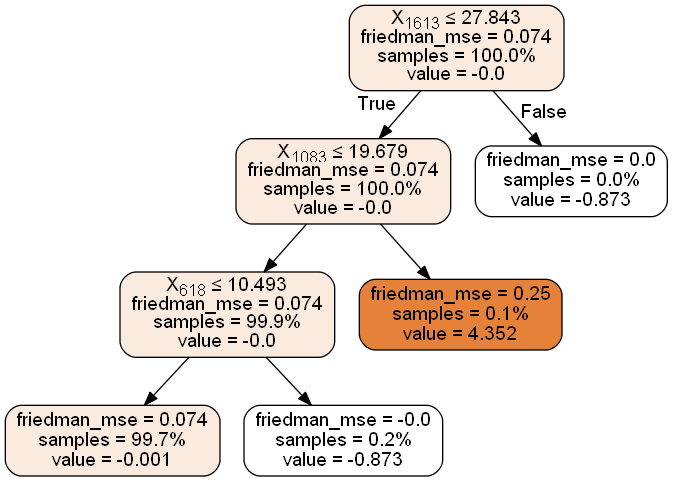

In [235]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())# Graph tree

In [236]:
# Run an analysis on the feature importance 

importances = classifier.feature_importances_

In [ ]:
# We can sort the features by their importance
sorted(zip(classifier.feature_importances_, X.columns), reverse=True)



<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

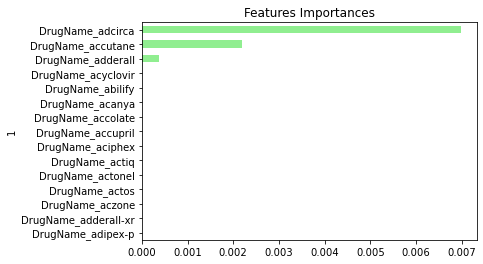

In [239]:
# Visualize the top 15 drugs by correlation to predicted output
importances_df = pd.DataFrame(sorted(zip(classifier.feature_importances_, X.columns[:15]), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

